### Import packages and data.

In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
##from graphviz import Graph

<b> NOTE: python-graphviz must first be installed in order to run the above import.

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [3]:
facebook = pd.read_csv('Features_Variant_1.csv', header=None)
test1 = pd.read_csv('Test_Case_1.csv', header=None)
test2 = pd.read_csv('Test_Case_2.csv', header=None)
test3 = pd.read_csv('Test_case_3.csv', header=None)
test4 = pd.read_csv('Test_case_4.csv', header=None)
test5 = pd.read_csv('Test_case_5.csv', header=None)
test6 = pd.read_csv('Test_case_6.csv', header=None)
test7 = pd.read_csv('Test_case_7.csv', header=None)
test8 = pd.read_csv('Test_case_8.csv', header=None)
test9 = pd.read_csv('Test_case_9.csv', header=None)
test10 = pd.read_csv('Test_case_10.csv', header=None)

In [4]:
facebook = facebook.append([test1, test2, test3, test4, test5, test6, test7, test8, test9, test10], ignore_index=True)

In [5]:
new_names = ['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3', 'PageCategory_4']
old_names = facebook.columns[0:4]
facebook.rename(columns=dict(zip(old_names, new_names)), inplace=True)

new_names2 = ['CommentsBeforeBase_30', 'CommentsLast24h_31', 'CommentsLast48to24h_32', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'BaseTime_35',
'PostLength_36', 'PostShareCnt_37', 'PostPromoStatus_38', 'HoursReceived_39', 'SundayPublished_40', 'MondayPublished_41', 'TuesdayPublisher_42',
'WednesdayPublished_43', 'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46', 'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49',
'WednesdayBase_50', 'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53','CommentsNextH_Hours_54']
old_names2 = facebook.columns[29:54]
facebook.rename(columns=dict(zip(old_names2, new_names2)), inplace=True)

facebook2 = facebook.iloc[:, np.r_[0:4, 29:54]]
facebook2 = facebook2.drop('PostPromoStatus_38', axis=1)

### Feature Scaling.

In [6]:
mean_1 = sum(facebook2['PagePopularity_1'])/len(facebook2['PagePopularity_1'])
sd_1 = np.std(facebook2['PagePopularity_1'])
mean_2 = sum(facebook2['PageCheckins_2'])/len(facebook2['PageCheckins_2'])
sd_2 = np.std(facebook2['PageCheckins_2'])
mean_3 = sum(facebook2['PageTalkingAbout_3'])/len(facebook2['PageTalkingAbout_3'])
sd_3 = np.std(facebook2['PageTalkingAbout_3'])
mean_4 = sum(facebook2['PageCategory_4'])/len(facebook2['PageCategory_4'])
sd_4 = np.std(facebook2['PageCategory_4'])
mean_30 = sum(facebook2['CommentsBeforeBase_30'])/len(facebook2['CommentsBeforeBase_30'])
sd_30 = np.std(facebook2['CommentsBeforeBase_30'])
mean_31 = sum(facebook2['CommentsLast24h_31'])/len(facebook2['CommentsLast24h_31'])
sd_31 = np.std(facebook2['CommentsLast24h_31'])
mean_32= sum(facebook2['CommentsLast48to24h_32'])/len(facebook2['CommentsLast48to24h_32'])
sd_32 = np.std(facebook2['CommentsLast48to24h_32'])
mean_33= sum(facebook2['CommentsFirst24h_33'])/len(facebook2['CommentsFirst24h_33'])
sd_33 = np.std(facebook2['CommentsFirst24h_33'])
mean_34 = sum(facebook2['CommentsDiffFirstSecondDay_34'])/len(facebook2['CommentsDiffFirstSecondDay_34'])
sd_34 = np.std(facebook2['CommentsDiffFirstSecondDay_34'])
### find out if you should scale BaseTime 
mean_36 = sum(facebook2['PostLength_36'])/len(facebook2['PostLength_36'])
sd_36 = np.std(facebook2['PostLength_36'])
mean_37 = sum(facebook2['PostShareCnt_37'])/len(facebook2['PostShareCnt_37'])
sd_37 = np.std(facebook2['PostShareCnt_37'])
### find out if you should scale HoursReceived 
mean_39 = sum(facebook2['HoursReceived_39'])/len(facebook2['HoursReceived_39'])
sd_39 = np.std(facebook2['HoursReceived_39'])
mean_40 = sum(facebook2['SundayPublished_40'])/len(facebook2['SundayPublished_40'])
sd_40 = np.std(facebook2['SundayPublished_40'])
mean_41 = sum(facebook2['MondayPublished_41'])/len(facebook2['MondayPublished_41'])
sd_41 = np.std(facebook2['MondayPublished_41'])
mean_42 = sum(facebook2['TuesdayPublisher_42'])/len(facebook2['TuesdayPublisher_42'])
sd_42 = np.std(facebook2['TuesdayPublisher_42'])
mean_43 = sum(facebook2['WednesdayPublished_43'])/len(facebook2['WednesdayPublished_43'])
sd_43 = np.std(facebook2['WednesdayPublished_43'])
mean_44 = sum(facebook2['ThursdayPublished_44'])/len(facebook2['ThursdayPublished_44'])
sd_44 = np.std(facebook2['ThursdayPublished_44'])
mean_45 = sum(facebook2['FridayPublished_45'])/len(facebook2['FridayPublished_45'])
sd_45 = np.std(facebook2['FridayPublished_45'])
mean_46 = sum(facebook2['SaturdayPublished_46'])/len(facebook2['SaturdayPublished_46'])
sd_46 = np.std(facebook2['SaturdayPublished_46'])
mean_47 = sum(facebook2['SundayBase_47'])/len(facebook2['SundayBase_47'])
sd_47 = np.std(facebook2['SundayBase_47'])
mean_48 = sum(facebook2['MondayBase_48'])/len(facebook2['MondayBase_48'])
sd_48 = np.std(facebook2['MondayBase_48'])
mean_49 = sum(facebook2['TuesdayBase_49'])/len(facebook2['TuesdayBase_49'])
sd_49 = np.std(facebook2['TuesdayBase_49'])
mean_50 = sum(facebook2['WednesdayBase_50'])/len(facebook2['WednesdayBase_50'])
sd_50 = np.std(facebook2['WednesdayBase_50'])
mean_51 = sum(facebook2['ThursdayBase_51'])/len(facebook2['ThursdayBase_51'])
sd_51 = np.std(facebook2['ThursdayBase_51'])
mean_52 = sum(facebook2['FridayBase_52'])/len(facebook2['FridayBase_52'])
sd_52 = np.std(facebook2['FridayBase_52'])
mean_53 = sum(facebook2['SaturdayBase_53'])/len(facebook2['SaturdayBase_53'])
sd_53 = np.std(facebook2['SaturdayBase_53'])
## DO NOT scale the target (54)

In [7]:
facebook2_s = facebook2.copy()

In [8]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


In [9]:
facebook2_s['PagePopularity_1'] = (facebook2['PagePopularity_1'] - mean_1)/sd_1
facebook2_s['PageCheckins_2'] = (facebook2['PageCheckins_2'] - mean_2)/sd_2
facebook2_s['PageTalkingAbout_3'] = (facebook2['PageTalkingAbout_3'] - mean_3)/sd_3
facebook2_s['PageCategory_4'] = (facebook2['PageCategory_4'] - mean_4)/sd_4
facebook2_s['CommentsBeforeBase_30'] = (facebook2['CommentsBeforeBase_30'] - mean_30)/sd_30
facebook2_s['CommentsLast24h_31'] = (facebook2['CommentsLast24h_31'] - mean_31)/sd_31
facebook2_s['CommentsLast48to24h_32'] = (facebook2['CommentsLast48to24h_32'] - mean_32)/sd_32
facebook2_s['CommentsFirst24h_33'] = (facebook2['CommentsFirst24h_33'] - mean_33)/sd_33
facebook2_s['CommentsDiffFirstSecondDay_34'] = (facebook2['CommentsDiffFirstSecondDay_34'] - mean_34)/sd_34
## check to see if 35 should be scaled
facebook2_s['BaseTime_35'] = facebook2['BaseTime_35']
facebook2_s['PostLength_36'] = (facebook2['PostLength_36'] - mean_36)/sd_36
facebook2_s['PostShareCnt_37'] = (facebook2['PostShareCnt_37'] - mean_37)/sd_37
##facebook2_s['PostPromoStatus_38'] = (facebook2['PostPromoStatus_38'] - mean_38)/sd_38 --- appears to be zero
## check to see if 39 should be scaled
facebook2_s['HoursReceived_39'] = (facebook2['HoursReceived_39'] - mean_39)/sd_39
facebook2_s['SundayPublished_40'] = (facebook2['SundayPublished_40'] - mean_40)/sd_40
facebook2_s['MondayPublished_41'] = (facebook2['MondayPublished_41'] - mean_41)/sd_41
facebook2_s['TuesdayPublisher_42'] = (facebook2['TuesdayPublisher_42'] - mean_42)/sd_42
facebook2_s['WednesdayPublished_43'] = (facebook2['WednesdayPublished_43'] - mean_43)/sd_43
facebook2_s['ThursdayPublished_44'] = (facebook2['ThursdayPublished_44'] - mean_44)/sd_44
facebook2_s['FridayPublished_45'] = (facebook2['FridayPublished_45'] - mean_45)/sd_45
facebook2_s['SaturdayPublished_46'] = (facebook2['SaturdayPublished_46'] - mean_46)/sd_46
facebook2_s['SundayBase_47'] = (facebook2['SundayBase_47'] - mean_47)/sd_47
facebook2_s['MondayBase_48'] = (facebook2['MondayBase_48'] - mean_48)/sd_48
facebook2_s['TuesdayBase_49'] = (facebook2['TuesdayBase_49'] - mean_49)/sd_49
facebook2_s['WednesdayBase_50'] = (facebook2['WednesdayBase_50'] - mean_50)/sd_50
facebook2_s['ThursdayBase_51'] = (facebook2['ThursdayBase_51'] - mean_51)/sd_51
facebook2_s['FridayBase_52'] = (facebook2['FridayBase_52'] - mean_52)/sd_52
facebook2_s['SaturdayBase_53'] = (facebook2['SaturdayBase_53'] - mean_53)/sd_53
## don't scales the target
facebook2_s['CommentsNextH_Hours_54'] = facebook2['CommentsNextH_Hours_54']

#### Preview of Facebook data without Scaling.

In [10]:
facebook2.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


#### Preview of Facebook data with Scaling.

In [11]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,65,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
1,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,10,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,2.430059,-0.413965,0
2,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,14,...,2.393547,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
3,-0.107749,-0.220202,-0.359973,-1.161633,-0.348015,-0.277312,-0.228578,-0.347915,-0.066027,62,...,2.393547,-0.40196,-0.413886,2.541964,-0.393962,-0.411909,-0.418774,-0.411513,-0.413965,0
4,-0.107749,-0.220202,-0.359973,-1.161633,-0.389937,-0.277312,-0.269467,-0.392598,-0.036157,58,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,2.427723,-0.418774,-0.411513,-0.413965,0


### Thresholding.

Searching for an interesting threshold.

In [12]:
print("Mean:", facebook2['CommentsNextH_Hours_54'].mean(), "Median:", facebook2['CommentsNextH_Hours_54'].median())

Mean: 7.782068702472049 Median: 0.0


In [13]:
uni = facebook2['CommentsNextH_Hours_54'].unique()
len(uni)

381

In [14]:
zero = facebook2[facebook2['CommentsNextH_Hours_54']==0]['CommentsNextH_Hours_54'].count()
nonzero = facebook2[facebook2['CommentsNextH_Hours_54']!=0]['CommentsNextH_Hours_54'].count()

(-1.1261263161956454,
 1.1012441573352432,
 -1.1310040963462846,
 1.2158602877281068)

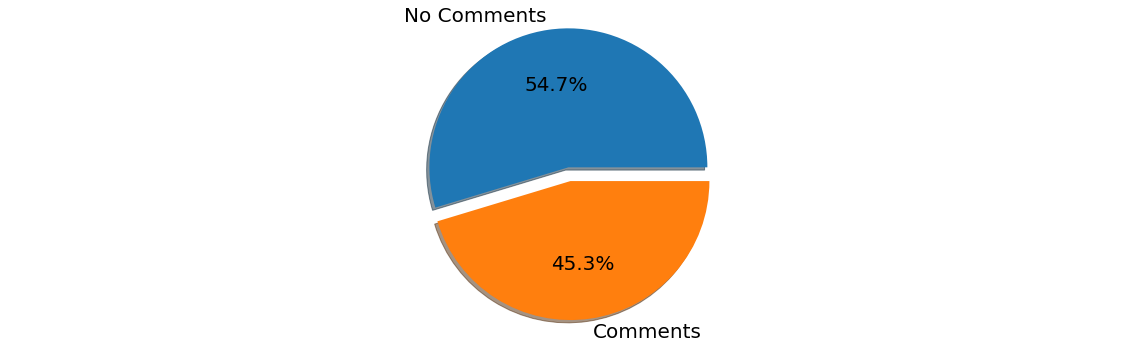

In [15]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = plt.subplot(111)

labels = 'No Comments', 'Comments'

sizes = [zero, nonzero]

ax1.pie(sizes, labels=labels, explode=[0.1,0], autopct='%1.1f%%', shadow=True, textprops={'fontsize':'20'})
ax1.axis('equal')

The above histogram suggests that '>0' may be an interesting threshold. What percentage of records have 0 comments in the next H hours?

In [16]:
print((round(facebook2[facebook2['CommentsNextH_Hours_54']==0]['CommentsNextH_Hours_54'].count() / facebook2['CommentsNextH_Hours_54'].count(), 4)*100), '%')

54.68 %


<b> Threshold: I will select 0 as a threshold. </b> Not only is there an even distribution between records with no comments and at least 1 comment in the next H hours, but the existence of any comments vs. no comments is a natural binary classification.

In [17]:
#### Create binary variable for classification analysis. Apply to both the scaled and unscaled data sets.

facebook2['Comment_Y'] = facebook2['CommentsNextH_Hours_54']>0
facebook2['Comment_Y'] = facebook2['Comment_Y'].apply(int)
facebook2_s['Comment_Y'] = facebook2['Comment_Y']

In [18]:
X = facebook2.iloc[:, 0:27]
y = facebook2.iloc[:, 28:29]
X_s = facebook2_s.iloc[:, 0:27]
y_s = pd.DataFrame(facebook2_s.iloc[:, 28:29])

In [19]:
y.head()

,Comment_Y
0,0
1,0
2,0
3,0
4,0


### Split Data

In [20]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.3, random_state=4786)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4786)

### Support Vector Machine

I initially ran svm.SVC with a linear kernel, but it ran for several minutes without returning. I read a recommendation on Stack Exchange that led me to test Linear SVC instead. When SVC finished in Spyder, I noticed that the  scores1 returned very similar outputs to LinearSVC so I decided to stick with LinearSVC for my baseline.

The performance of the following improved greatly when I added a random state.

In [21]:
from sklearn.model_selection import learning_curve

#### Linear kernel

In [22]:
SVM1 = svm.LinearSVC(random_state=3003)
scores1 = cross_val_score(SVM1, Xs_train, ys_train['Comment_Y'], cv=5)
scores1

array([ 0.78651685,  0.81086142,  0.80160082,  0.80364441,  0.80858311])

In [23]:
scores1.mean()

0.80224132300564344

In [24]:
SVM1

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=3003, tol=0.0001,
     verbose=0)

#### Experimentation with validation set size

In [25]:
train_sizes, train_scores, valid_scores = learning_curve(SVM1, Xs_train, ys_train['Comment_Y'], train_sizes=[1000, 2500, 5000, 7500, 10000], cv=5)

In [26]:
training = pd.DataFrame((train_scores))
validation = pd.DataFrame((valid_scores))

In [27]:
new_names = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
old_names_t = training.columns[0:5]
old_names_v = validation.columns[0:5]

In [28]:
training.rename(columns=dict(zip(old_names_t, new_names)), inplace=True)
validation.rename(columns=dict(zip(old_names_v, new_names)), inplace=True)

In [29]:
train_total = pd.Series(training.mean(axis=1))
val_total = pd.Series(validation.mean(axis=1))

In [30]:
train_total = pd.DataFrame(train_total)
train_total.rename(columns=({0:'Average'}), inplace=True)

val_total = pd.DataFrame(val_total)
val_total.rename(columns=({0:'Average'}), inplace=True)

In [31]:
training = pd.merge(training, train_total, left_index=True, right_index=True)
validation = pd.merge(validation, val_total, left_index=True, right_index=True)

In [32]:
validation.rename(index={0:train_sizes[0],1:train_sizes[1], 2:train_sizes[2], 3:train_sizes[3], 4:train_sizes[4]}, inplace=True)

In [33]:
training.rename(index={0:train_sizes[0],1:train_sizes[1], 2:train_sizes[2], 3:train_sizes[3], 4:train_sizes[4]}, inplace=True)

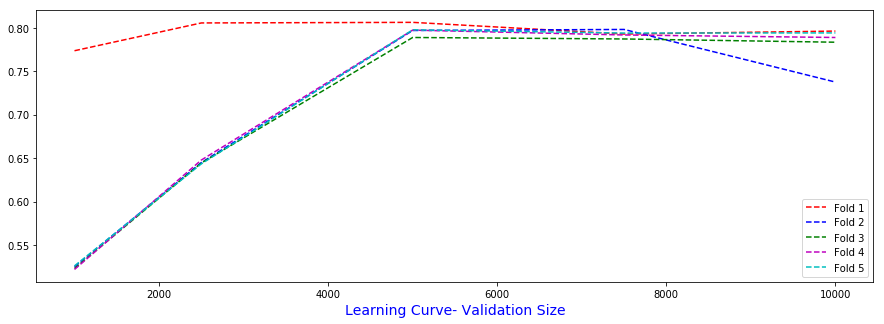

In [34]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(validation.index, validation['Fold 1'], 'r--', label='Fold 1')
ax1.plot(validation.index, validation['Fold 2'], 'b--', label='Fold 2')
ax1.plot(validation.index, validation['Fold 3'], 'g--', label='Fold 3')
ax1.plot(validation.index, validation['Fold 4'], 'm--', label='Fold 4')
ax1.plot(validation.index, validation['Fold 5'], 'c--', label='Fold 5')

ax1.set_xlabel('Learning Curve- Validation Size', fontsize=14, color='b')

plt.legend()

plt.show()

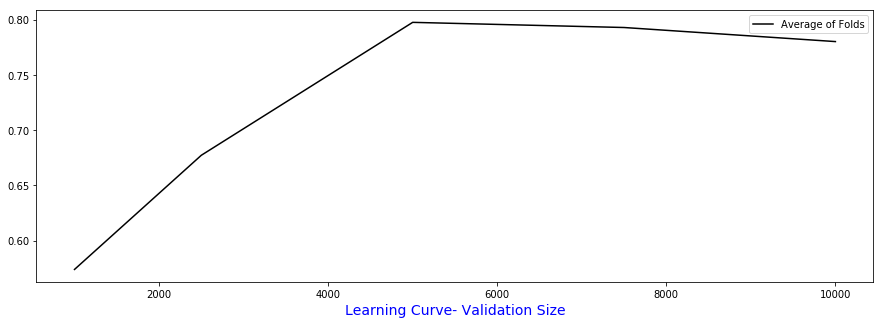

In [35]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(validation.index, validation['Average'], 'k-', label='Average of Folds')

ax1.set_xlabel('Learning Curve- Validation Size', fontsize=14, color='b')

plt.legend()

plt.show()

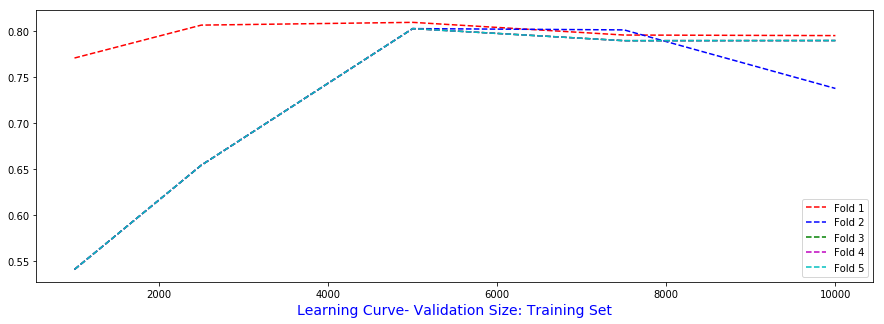

In [36]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(training.index, training['Fold 1'], 'r--', label='Fold 1')
ax1.plot(training.index, training['Fold 2'], 'b--', label='Fold 2')
ax1.plot(training.index, training['Fold 3'], 'g--', label='Fold 3')
ax1.plot(training.index, training['Fold 4'], 'm--', label='Fold 4')
ax1.plot(training.index, training['Fold 5'], 'c--', label='Fold 5')

ax1.set_xlabel('Learning Curve- Validation Size: Training Set', fontsize=14, color='b')

plt.legend()

plt.show()

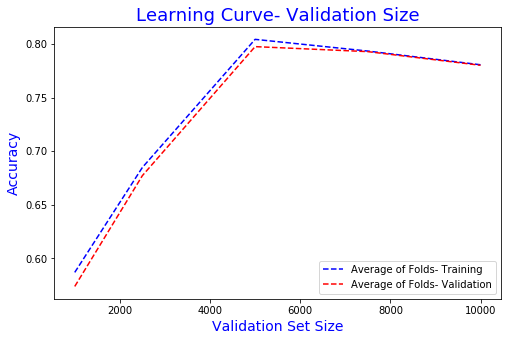

In [37]:
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(training.index, training['Average'], 'b--', label='Average of Folds- Training')
ax1.plot(validation.index, validation['Average'], 'r--', label='Average of Folds- Validation')

ax1.set_xlabel('Validation Set Size', fontsize=14, color='b')
ax1.set_ylabel('Accuracy', fontsize=14, color='b')
plt.title('Learning Curve- Validation Size', fontsize=18, color='b')

plt.legend()

plt.show()

Testing with C.

In [38]:
C_vals = np.array(range(1,6))

In [39]:
param_grid = dict(C = C_vals)
param_grid

{'C': array([1, 2, 3, 4, 5])}

In [40]:
SVM_C = GridSearchCV(SVM1, param_grid, cv=5)

In [41]:
SVM_C.fit(Xs_train, ys_train['Comment_Y'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=3003, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5])}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [42]:
SVM_C.cv_results_

C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 8.49875016,  8.25132246,  9.24464822,  8.42495804,  8.89387598]),
 'mean_score_time': array([ 0.00367036,  0.0036181 ,  0.00426555,  0.00525837,  0.00436873]),
 'mean_test_score': array([ 0.80224084,  0.7230282 ,  0.73906825,  0.61268901,  0.6414998 ]),
 'mean_train_score': array([ 0.8042329 ,  0.72549911,  0.73767706,  0.61223583,  0.64234227]),
 'param_C': masked_array(data = [1 2 3 4 5],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'C': 1}, {'C': 2}, {'C': 3}, {'C': 4}, {'C': 5}],
 'rank_test_score': array([1, 3, 2, 5, 4]),
 'split0_test_score': array([ 0.78651685,  0.7597889 ,  0.81477698,  0.81171263,  0.45216207]),
 'split0_train_score': array([ 0.78957003,  0.76441039,  0.81519796,  0.81013197,  0.45227756]),
 'split1_test_score': array([ 0.81086142,  0.7989445 ,  0.4588015 ,  0.8030303 ,  0.81477698]),
 'split1_train_score': array([ 0.80851426,  0.79816943,  0.4584504 ,  0.800298  ,  0.80936569]),
 'split2

In [43]:
C_vals= [1,.1, .01, .001, .0001]

In [44]:
param_grid = dict(C = C_vals)
param_grid

{'C': [1, 0.1, 0.01, 0.001, 0.0001]}

In [45]:
SVM_C2 = GridSearchCV(SVM1, param_grid, cv=5)

In [46]:
SVM_C2.fit(Xs_train, ys_train['Comment_Y'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=3003, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
SVM_C2.cv_results_

C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 7.86233096,  4.44297824,  6.30039229,  1.26003628,  0.26317391]),
 'mean_score_time': array([ 0.00367093,  0.00218768,  0.00337868,  0.00477624,  0.00416245]),
 'mean_test_score': array([ 0.80224084,  0.81123144,  0.80884757,  0.80019752,  0.7753712 ]),
 'mean_train_score': array([ 0.8042329 ,  0.8116402 ,  0.80969902,  0.80039335,  0.77567772]),
 'param_C': masked_array(data = [1 0.1 0.01 0.001 0.0001],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'C': 1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.001}, {'C': 0.0001}],
 'rank_test_score': array([3, 1, 2, 4, 5]),
 'split0_test_score': array([ 0.78651685,  0.81392577,  0.81528771,  0.80371127,  0.77562138]),
 'split0_train_score': array([ 0.78957003,  0.81715624,  0.81502767,  0.80170285,  0.77530864]),
 'split1_test_score': array([ 0.81086142,  0.81545795,  0.80694586,  0.80047668,  0.77306776]),
 'split1_train_score': array([ 0.80851426,  0.81204768,  0.8085994 ,  0.79991

In [48]:
y_pred = SVM_C2.best_estimator_.predict(X_train)

In [ ]:
y_pred_test = SVM_C2.best_estimator_.predict(X_test)

In [49]:
SVM_C2Results = SVM_C2.cv_results_

In [50]:
conf_matrix_SVMC2 = confusion_matrix(y_train, y_pred)
conf_matrix_SVMC2

array([[ 7113,  8974],
       [ 2999, 10278]], dtype=int64)

In [51]:
conf_matrix_SVMC2 = pd.DataFrame(conf_matrix_SVMC2)

In [52]:
conf_matrix_SVMC2.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
conf_matrix_SVMC2.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)

In [53]:
conf_matrix_SVMC2

,Positive Predicted,Negative Predicted
Positive,7113,8974
Negative,2999,10278


In [54]:
sensitivity_SVMC2 = conf_matrix_SVMC2['Positive Predicted'][0]/(conf_matrix_SVMC2['Positive Predicted'][0] + conf_matrix_SVMC2['Negative Predicted'][0])
specificity_SVMC2 = conf_matrix_SVMC2['Negative Predicted'][1]/(conf_matrix_SVMC2['Negative Predicted'][1] + conf_matrix_SVMC2['Positive Predicted'][1])

In [55]:
print("Sensitivity for SVM- C2:", (round(sensitivity_SVMC2,4)*100), "% | Specificity for SVM- C2:", (round(specificity_SVMC2, 4)*100), "%")

Sensitivity for SVM- C2: 44.22 % | Specificity for SVM- C2: 77.41 %


In [56]:
print(roc_curve(y_train, y_pred))

(array([ 0.        ,  0.55784174,  1.        ]), array([ 0.        ,  0.77412066,  1.        ]), array([2, 1, 0], dtype=int64))


In [57]:
print("Classification Report for SVM-C2: \n\n", classification_report(y_train,y_pred))

Classification Report for SVM-C2: 

              precision    recall  f1-score   support

          0       0.70      0.44      0.54     16087
          1       0.53      0.77      0.63     13277

avg / total       0.63      0.59      0.58     29364



In [58]:
C_vals = param_grid['C']

In [59]:
Avg = SVM_C2Results['mean_test_score']

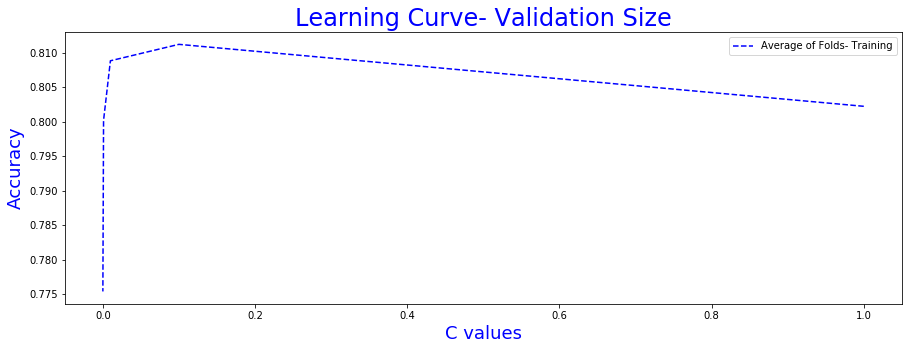

In [60]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(C_vals, Avg, 'b--', label='Average of Folds- Training')

ax1.set_xlabel('C values', fontsize=18, color='b')
ax1.set_ylabel('Accuracy', fontsize=18, color='b')
plt.title('Learning Curve- Validation Size', fontsize=24, color='b')

plt.legend()

plt.show()

C of 0.1 appears to have the best performance so far. Testing values of more similar size.

In [61]:
C_vals = [0.1, 0.2, 0.5, 0.75, 1]

In [62]:
param_grid = dict(C = C_vals)
param_grid

{'C': [0.1, 0.2, 0.5, 0.75, 1]}

In [63]:
SVM_C3 = GridSearchCV(SVM1, param_grid, cv=5)

In [64]:
SVM_C3.fit(Xs_train, ys_train['Comment_Y'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=3003, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.2, 0.5, 0.75, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [65]:
SVM_C3.cv_results_

C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 8.52955995,  9.65196333,  8.51472673,  8.61094499,  7.41829271]),
 'mean_score_time': array([ 0.00406713,  0.00437727,  0.00480175,  0.00417905,  0.00366006]),
 'mean_test_score': array([ 0.81123144,  0.79675793,  0.79985697,  0.79668982,  0.80224084]),
 'mean_train_score': array([ 0.8116402 ,  0.79824831,  0.80064919,  0.79628977,  0.8042329 ]),
 'param_C': masked_array(data = [0.1 0.2 0.5 0.75 1],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'C': 0.1}, {'C': 0.2}, {'C': 0.5}, {'C': 0.75}, {'C': 1}],
 'rank_test_score': array([1, 4, 3, 5, 2]),
 'split0_test_score': array([ 0.81392577,  0.81273408,  0.81716037,  0.81375553,  0.78651685]),
 'split0_train_score': array([ 0.81715624,  0.81328225,  0.81698595,  0.80966369,  0.78957003]),
 'split1_test_score': array([ 0.81545795,  0.8123936 ,  0.81103166,  0.78719782,  0.81086142]),
 'split1_train_score': array([ 0.81204768,  0.81017454,  0.8100894 ,  0.78859089,  0.80

C = 0.1 again results in the best accuracy.

In [66]:
SVM1_best = svm.LinearSVC(random_state=3003, C=0.1)
scores1_best = cross_val_score(SVM1_best, Xs_train, ys_train['Comment_Y'], cv=5)
scores1_best

array([ 0.81392577,  0.81545795,  0.80262262,  0.8102861 ,  0.8138624 ])

In [67]:
print("CV Accuracy for Optimal SVM (Linear): ", (round(scores1_best.mean(), 4)*100), "%")

CV Accuracy for Optimal SVM (Linear):  81.12 %


In [68]:
###stopped here

In [69]:
##y_pred_SVM_best = SVM1_best.predict(X_train)

In [70]:
##print(classification_report(y_train,Y_pred_SVM_best))

#### Sigmoid kernel

It doesn't look like the data fits the sigmoid function. Performance worsened significantly.

In [71]:
SVM2 = svm.SVC(random_state=3003, kernel = 'sigmoid')
scores2 = cross_val_score(SVM2, Xs_train, ys_train['Comment_Y'], cv=5)
scores2

array([ 0.65355805,  0.64521621,  0.64117847,  0.65122616,  0.3094346 ])

In [72]:
scores2.mean()

0.58012269930112759

#### Gaussian radial basis kernel

In [73]:
SVM3 = svm.SVC(random_state=3003, kernel = 'rbf')
scores3 = cross_val_score(SVM3, Xs_train, ys_train['Comment_Y'], cv=5)
scores3

array([ 0.79673136,  0.79605039,  0.79308583,  0.79853542,  0.79751362])

In [74]:
scores3.mean()

0.79638332549386337

In [75]:
SVM4 = svm.SVC(random_state=3003, kernel = 'rbf', gamma=.001)
scores4 = cross_val_score(SVM4, Xs_train, ys_train['Comment_Y'], cv=5)
scores4

array([ 0.78804903,  0.78413347,  0.78116485,  0.78763624,  0.78831744])

In [76]:
scores4.mean()

0.78586020555182912

In [77]:
SVM5 = svm.SVC(random_state=3003, kernel = 'rbf', gamma=.01)
scores5 = cross_val_score(SVM5, Xs_train, ys_train['Comment_Y'], cv=5)
scores5

array([ 0.79945523,  0.79945523,  0.79274523,  0.80126022,  0.80177112])

In [78]:
scores5.mean()

0.79893740392010604

In [79]:
SVM6 = svm.SVC(random_state=3003, kernel = 'rbf', gamma=.1)
scores6 = cross_val_score(SVM6, Xs_train, ys_train['Comment_Y'], cv=5)
scores6

array([ 0.78413347,  0.7834525 ,  0.77861035,  0.78848774,  0.79036104])

In [80]:
scores6.mean()

0.78500902002914985

#### Summary of SVM results

In [81]:
functs = ['Linear', 'Logistic', 'Radial Basis']

In [82]:
res = [scores1.mean(), scores2.mean(), scores3.mean()]

Text(0.5,1,'Baseline of Accuracy by Kernel Type')

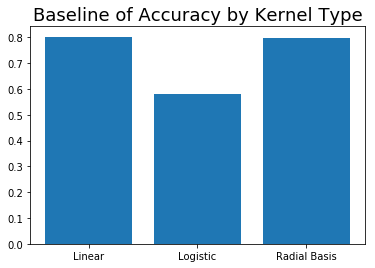

In [83]:
plt.bar(functs, res)
plt.title('Baseline of Accuracy by Kernel Type', fontsize = 18)

In [84]:
functs_rbf = ['gamma=.001', 'gamma=.01', 'gamma=.1']

In [85]:
res_rbf = [scores4.mean(), scores5.mean(), scores6.mean()]

Text(0.5,1,'Performance of Gaussian RBF by gamma')

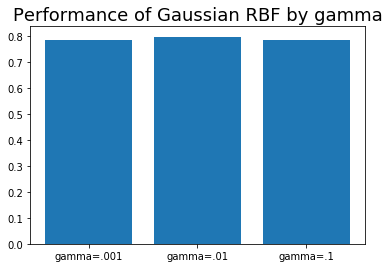

In [86]:
plt.bar(functs_rbf, res_rbf)
plt.title('Performance of Gaussian RBF by gamma', fontsize = 18)

## Decision Trees

First, run the baseline model and read the default parameters for ideas about further testing.

In [87]:
DTC = tree.DecisionTreeClassifier()
scoresDT1 = cross_val_score(DTC, Xs_train, ys_train['Comment_Y'], cv=5)
scoresDT1

array([ 0.76625809,  0.75553286,  0.76362398,  0.75834469,  0.76822207])

In [88]:
scoresDT1.mean()

0.7623963357668162

In [89]:
DTC

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test and see if entropy yields better results than gini.

In [90]:
### try switching from gini index to information gain
DTC2 = tree.DecisionTreeClassifier(criterion='entropy')
scoresDT2 = cross_val_score(DTC2, Xs_train, ys_train['Comment_Y'], cv=5)
scoresDT2

array([ 0.77238679,  0.76898195,  0.76907357,  0.77435286,  0.76651907])

In [91]:
scoresDT2.mean()

0.77026284954062552

Text(0.5,0,'Fold')

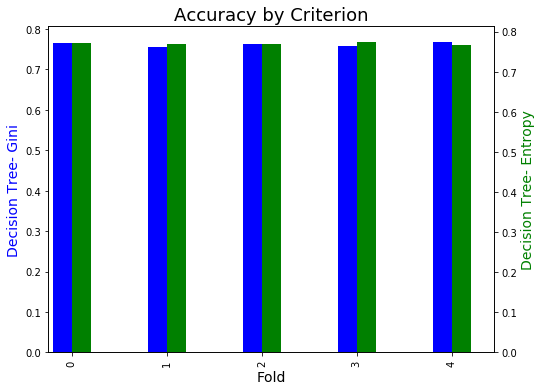

In [92]:
scoresDT1 = pd.Series(scoresDT1)
scoresDT2 = pd.Series(scoresDT2)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()

ax1 = scoresDT1.plot(kind='bar', color='b', ax=ax1, width=0.2, position=1)
ax2 = scoresDT2.plot(kind='bar', color='g', ax=ax2, width=0.2, position=0)

ax1.set_title("Accuracy by Criterion", fontsize=18)
ax1.set_ylabel("Decision Tree- Gini", fontsize=14, color='b')
ax2.set_ylabel("Decision Tree- Entropy", fontsize=14, color='g')
ax1.set_xlabel("Fold", fontsize=14)

Experiment with max depth.

In [93]:
m_depth = np.array(range(1,31))

In [94]:
param_grid = dict(max_depth = m_depth)
param_grid

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}

In [95]:
DTC3 = GridSearchCV(DTC2, param_grid, cv=5)

In [96]:
DTC3.fit(Xs_train, ys_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
DTC3.cv_results_

C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 0.04702187,  0.08035135,  0.1096971 ,  0.14086499,  0.17221279,
         0.20891404,  0.28067293,  0.27651782,  0.29710436,  0.36505618,
         0.35808625,  0.38827062,  0.43995214,  0.42546411,  0.48568506,
         0.47596931,  0.52080016,  0.51038389,  0.53944826,  0.53062119,
         0.5644486 ,  0.53261776,  0.58061213,  0.52873626,  0.59692826,
         0.58656912,  0.59807072,  0.55829821,  0.59270048,  0.5704318 ]),
 'mean_score_time': array([ 0.00318131,  0.00397496,  0.00386925,  0.00413408,  0.00398116,
         0.00407481,  0.00462694,  0.00431771,  0.00427942,  0.00527163,
         0.00479503,  0.00456762,  0.00550346,  0.00498314,  0.00585227,
         0.00526156,  0.00556774,  0.00517235,  0.00526485,  0.00526576,
         0.00555611,  0.0053575 ,  0.00555468,  0.00570254,  0.00642776,
         0.00565529,  0.0056673 ,  0.00537581,  0.00605493,  0.00602202]),
 'mean_test_score': array([ 0.80656586,  0.80809835,  0.82597739,  0.82727149,  0.82

It looks like the best performance is with depat @~6 so there was definitely overfitting going on previously.

In [98]:
DTC3_mean_scores = DTC3.cv_results_['mean_test_score']

Text(0.5,1,'Accuracy at Max Depth- Model DTC-3')

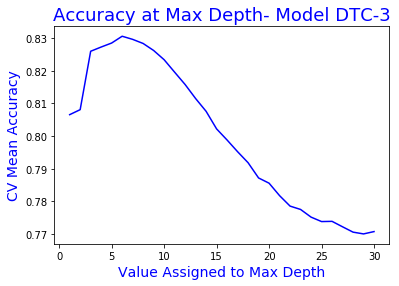

In [99]:
plt.plot(m_depth, DTC3_mean_scores, color='b')
plt.xlabel('Value Assigned to Max Depth', fontsize=14, color='b')
plt.ylabel('CV Mean Accuracy', fontsize=14, color='b')
plt.title('Accuracy at Max Depth- Model DTC-3', fontsize=18, color='b')

Also testing with min_leaf_samples since this is another method for pruning DecisionTreeClassifier.
<br> Here I first tested max leafs 1:101 by 5. Since performance was improving, I tried 1:1001 by 51.
<br> I finally settled on a search of 1:201 by 10.

In [100]:
leafs = np.array(range(1,202,10))

In [101]:
param_grid = dict(min_samples_leaf = leafs)
param_grid

{'min_samples_leaf': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
        131, 141, 151, 161, 171, 181, 191, 201])}

In [102]:
DTC4 = GridSearchCV(DTC2, param_grid, cv=5)

In [103]:
DTC4.fit(Xs_train, ys_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
DTC4.cv_results_

C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 0.56454735,  0.47773976,  0.39600606,  0.36842146,  0.37557106,
         0.32021832,  0.31674705,  0.3443346 ,  0.29968553,  0.29571328,
         0.31530061,  0.28052726,  0.27230434,  0.26893854,  0.29571481,
         0.25848689,  0.2554409 ,  0.24893932,  0.28738112,  0.26486411,
         0.24988599]),
 'mean_score_time': array([ 0.00576067,  0.00536451,  0.00466962,  0.0046834 ,  0.00526323,
         0.00487437,  0.00476165,  0.0052485 ,  0.00467381,  0.00497384,
         0.00596585,  0.00446362,  0.00466352,  0.00496092,  0.00583873,
         0.00458307,  0.00447049,  0.00453362,  0.0050724 ,  0.00456362,
         0.00466928]),
 'mean_test_score': array([ 0.76913908,  0.80203651,  0.81623757,  0.82168642,  0.82454706,
         0.82631794,  0.82621577,  0.82856559,  0.82859965,  0.82856559,
         0.82897425,  0.83009808,  0.83098352,  0.8305408 ,  0.83020025,
         0.83013213,  0.82951914,  0.82897425,  0.82900831,  0.82897425,
         0.82866776]),


Best performance appears to be somewhere around 120.

In [105]:
DTC4_mean_scores = DTC4.cv_results_['mean_test_score']

Text(0.5,1,'Accuracy at Min. Samples for Leaf- Model DTC-4')

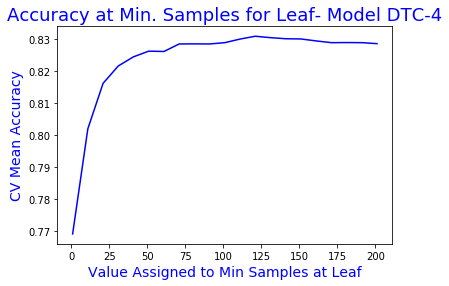

In [106]:
plt.plot(leafs, DTC4_mean_scores, color='b')
plt.xlabel('Value Assigned to Min Samples at Leaf', fontsize=14, color='b')
plt.ylabel('CV Mean Accuracy', fontsize=14, color='b')
plt.title('Accuracy at Min. Samples for Leaf- Model DTC-4', fontsize=18, color='b')

Optimization of Max Depth and Minimum Samples at the Leaf Node will be best if combined.

In [107]:
param_grid = dict(max_depth = m_depth, min_samples_leaf = leafs)

In [108]:
DTC5 = GridSearchCV(DTC2, param_grid, cv=5)
DTC5.fit(Xs_train, ys_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'min_samples_leaf': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
pd.DataFrame(DTC5.cv_results_)[['mean_test_score', 'params']]

C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\katri\Anaconda3\lib\site-packages\sklearn\utils\

,mean_test_score,params
0,0.806566,"{'max_depth': 1, 'min_samples_leaf': 1}"
1,0.806566,"{'max_depth': 1, 'min_samples_leaf': 11}"
2,0.806566,"{'max_depth': 1, 'min_samples_leaf': 21}"
3,0.806566,"{'max_depth': 1, 'min_samples_leaf': 31}"
4,0.806566,"{'max_depth': 1, 'min_samples_leaf': 41}"
5,0.806566,"{'max_depth': 1, 'min_samples_leaf': 51}"
6,0.806566,"{'max_depth': 1, 'min_samples_leaf': 61}"
7,0.806566,"{'max_depth': 1, 'min_samples_leaf': 71}"
8,0.806566,"{'max_depth': 1, 'min_samples_leaf': 81}"
9,0.806566,"{'max_depth': 1, 'min_samples_leaf': 91}"


In [110]:
DTC5.best_params_

{'max_depth': 6, 'min_samples_leaf': 71}

Best Parameters: Depth of 6; Minimum Samples of 71
<br>
<br> Modeling on Best Parameters.

In [111]:
DTC6 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=71, random_state = 3003)
DTC6.fit(Xs_train, ys_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=71, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3003,
            splitter='best')

In [112]:
print(DTC6.tree_)

In [113]:
print("Accuracy for Optimal Decision Tree Model: ", (round(DTC6.score(Xs_train, ys_train), 4)*100), "%")

Accuracy for Optimal Decision Tree Model:  83.46 %


tree_data = tree.export_graphviz (
    DTC6,
    feature_names = X_train.columns
    class_names = 'Comments', 'No_Comments'
    filled=True
    rounded=True
)
graph = graphviz.Source(tree_data)
graph

## Boosting

#### AdaBoost

In [114]:
ABT = AdaBoostClassifier(random_state=3003)
scoresBase = cross_val_score(ABT, Xs_train, ys_train['Comment_Y'], cv=5)

In [115]:
scoresBase

array([ 0.83418454,  0.83282261,  0.83021117,  0.83378747,  0.82663488])

In [116]:
scoresBase.mean()

0.83152813302791873

In [125]:
n = [5, 10, 25]

In [126]:
ABT = AdaBoostClassifier(random_state=3003)
param_grid = dict(n_estimators = n)
ABT2 = GridSearchCV(ABT, param_grid, cv=5)

#### GBM

In [130]:
GBMbase = GradientBoostingClassifier(random_state=3003)
scoresGBase = cross_val_score(GBMbase, Xs_train, ys_train['Comment_Y'], cv=5)
scoresGBase

array([ 0.84252639,  0.84048349,  0.83480926,  0.84145095,  0.83617166])

In [134]:
scoresGBase

array([ 0.84252639,  0.84048349,  0.83480926,  0.84145095,  0.83617166])

In [135]:
scoresGBase.mean()

0.83908835082602029

In [136]:
GBM = GradientBoostingClassifier(learning_rate=0.2, max_depth=6, random_state=3003)
scoresG1 = cross_val_score(GBM, Xs_train, ys_train['Comment_Y'], cv=5)
scoresG1

array([ 0.83248212,  0.83741914,  0.82850817,  0.83685286,  0.82833787])

In [137]:
scoresG1.mean()

0.83272003397412886

In [138]:
GBM

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=3003, subsample=1.0, verbose=0,
              warm_start=False)

In [139]:
GBM2 = GradientBoostingClassifier(learning_rate=0.05, max_depth=6, random_state=3003)
scoresG2 = cross_val_score(GBM2, Xs_train, ys_train['Comment_Y'], cv=5)
scoresG2

array([ 0.84031324,  0.84320735,  0.83549046,  0.83855586,  0.83446866])

In [140]:
scoresG2.mean()

0.83840711712539162

In [141]:
GBM3 = GradientBoostingClassifier(min_samples_leaf=171, max_depth=6, random_state=3003, learning_rate = 0.05)
scoresG3 = cross_val_score(GBM3, Xs_train, ys_train['Comment_Y'], cv=5)
scoresG3

array([ 0.84116445,  0.84354784,  0.83617166,  0.83787466,  0.83583106])

In [142]:
scoresG3.mean()

0.8389179351300099